In [2]:
#Load Libraries
import os, random
import numpy as np
import pandas as pd
from PIL import Image
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats as st
import urllib

#for image processing
import skimage
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

#for neural network creation and training
import tensorflow as tf
import keras
from keras.models import *
from keras.layers import *
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import keras.backend as K

#used to import network model which will be defined in parc library
os.chdir("..")
from parc import model

c:\Users\josep\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\josep\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\josep\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# To get data set and trained weights: processed data (by Phong)
# todo: make sure processed data (modularization) and Phong's data (data_in.npy and data_out.npy) match

url_input = 'https://virginia.box.com/shared/static/fosmd65cvw5z6vx1a9jfbxv4pgxj8x3b.npy'
url_output = 'https://virginia.box.com/shared/static/13d2ga8nfc4bg68lvpfm65rx7atl4mft.npy'
url_model = 'https://virginia.box.com/shared/static/7z3e829q7wytipdk2qm9zow41w0myte8.h5'

print( 'get input data:', end='\t')
response = urllib.request.urlretrieve(url_input, 'data_in.npy')
print( 'complete' )

print( 'get output data:', end='\t')
response = urllib.request.urlretrieve(url_output, 'data_out.npy')
print( 'complete' )

print( 'get pre-trained model:', end='\t')
response = urllib.request.urlretrieve(url_model, 'preTrain.h5')
print( 'complete' )


get input data:	complete
get output data:	complete
get pre-trained model:	complete


In [5]:
data_in = np.load( 'data_in.npy' ) 
data_out = np.load( 'data_out.npy' ) 

print( data_in.shape ) 
print( data_out.shape ) 

data_out = data_out[:,:480,:480,:]
data_in = data_in[:,:480,:480,:]

data_out = skimage.measure.block_reduce(np.squeeze(data_out) , (1,2,2,1), np.max)
data_in = skimage.measure.block_reduce(np.squeeze(data_in) , (1,2,2,1), np.mean)
data_in[:,:,:,:1] = data_in[:,:,:,:1]>0
data_in[:,:,:,:1] = (data_in[:,:,:,:1]*2.0)-1.0

X_train = np.concatenate((data_in[:10,:,:,:],data_in[14:24,:,:,:],data_in[28:38,:,:,:]),axis = 0)
y_train = np.concatenate((data_out[:10,:,:,2:],data_out[14:24,:,:,2:],data_out[28:38,:,:,2:]),axis = 0)
X_train_init = np.concatenate((data_out[:10,:,:,0:2],data_out[14:24,:,:,0:2],data_out[28:38,:,:,0:2]),axis = 0)


#Validation
X_val = np.concatenate((data_in[10:11,:,:,:],data_in[24:25,:,:,:],data_in[38:39,:,:,:]),axis = 0)
y_val = np.concatenate((data_out[10:11,:,:,2:],data_out[24:25,:,:,2:],data_out[38:39,:,:,2:]),axis = 0)
X_val_init = np.concatenate((data_out[10:11,:,:,0:2],data_out[24:25,:,:,0:2],data_out[38:39,:,:,0:2]),axis = 0)

# Test
test_X = np.concatenate((data_in[11:14,:,:,:],data_in[25:28,:,:,:],data_in[39:,:,:,:]),axis = 0)
test_Y = np.concatenate((data_out[11:14,:,:,2:],data_out[25:28,:,:,2:],data_out[39:,:,:,2:]),axis = 0)
test_X_init = np.concatenate((data_out[11:14,:,:,0:2],data_out[25:28,:,:,0:2],data_out[39:,:,:,0:2]),axis = 0)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(test_X.shape)
print(test_Y.shape)

(42, 485, 485, 2)
(42, 485, 485, 78)
(30, 240, 240, 2)
(30, 240, 240, 76)
(3, 240, 240, 2)
(3, 240, 240, 76)
(9, 240, 240, 2)
(9, 240, 240, 76)


In [6]:
# load pretrained model on modularized parc
parc = model.PARC(input_size=240, n_fields=2, n_timesteps=19)
parc.build()
# parc.summary()

In [7]:
parc.load_weights('preTrain.h5')

In [8]:
train_pred = parc.predict( [X_train, X_train_init])
test_pred = parc.predict( [test_X, test_X_init] )

1/1 [==============================] - 45s 45s/step


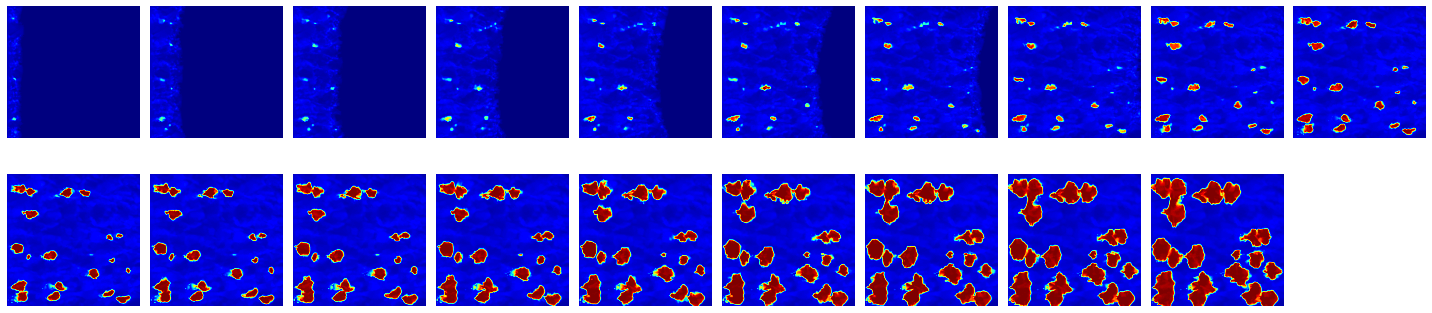

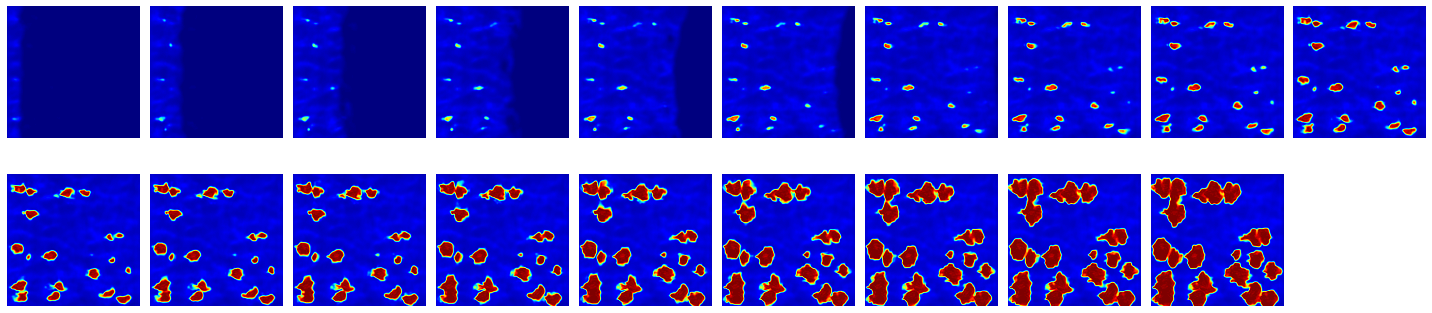

<Figure size 432x288 with 0 Axes>

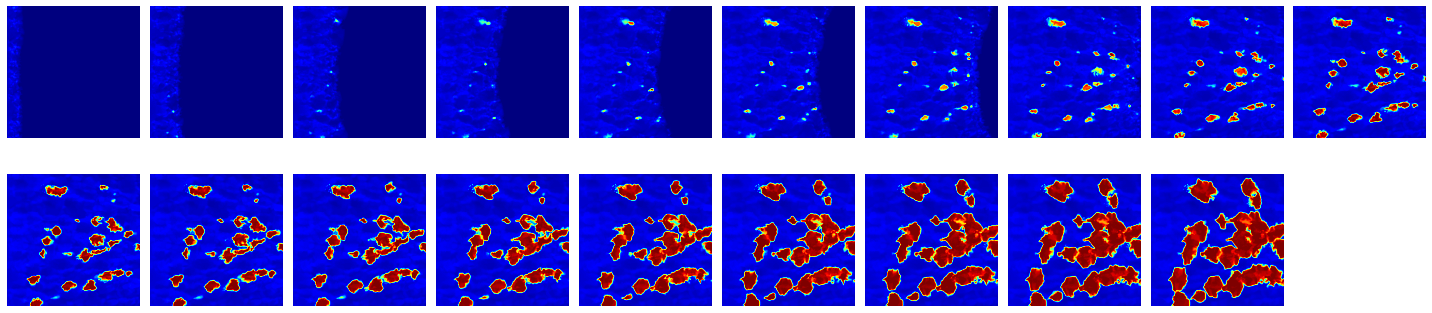

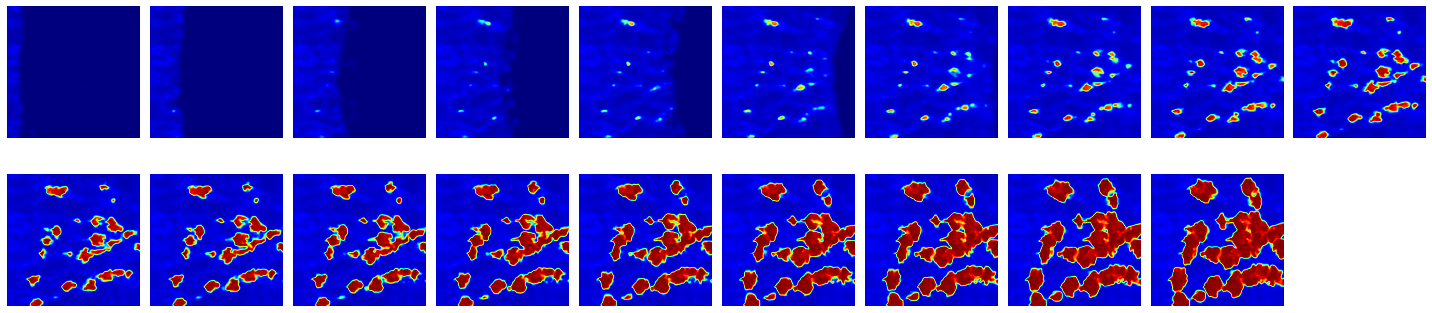

<Figure size 432x288 with 0 Axes>

In [11]:
# inference on train data set

# for case_idx in range(len(test_pred[0])):
for case_idx in range(2):
  plt.figure( figsize=(20, 5) ) 
  for i in range(19):
      plt.subplot(2, 10, i+1)
      plt.imshow( y_train[case_idx, :, :, i * 2], cmap='jet', vmin=-1., vmax=1. )
      plt.axis('off')
  plt.tight_layout()
  plt.figure( figsize=(20, 5) ) 
  for i in range(19):
      plt.subplot(2, 10, i+1)
      plt.imshow( train_pred[0][case_idx, :, :, i * 2], cmap='jet', vmin=-1., vmax=1. )
      plt.axis('off')
  plt.tight_layout()
  plt.show()
  plt.figure()

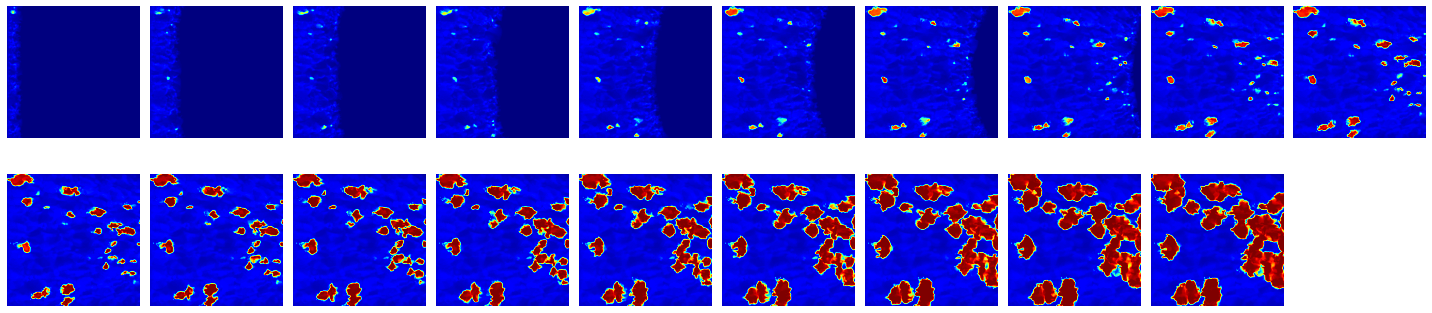

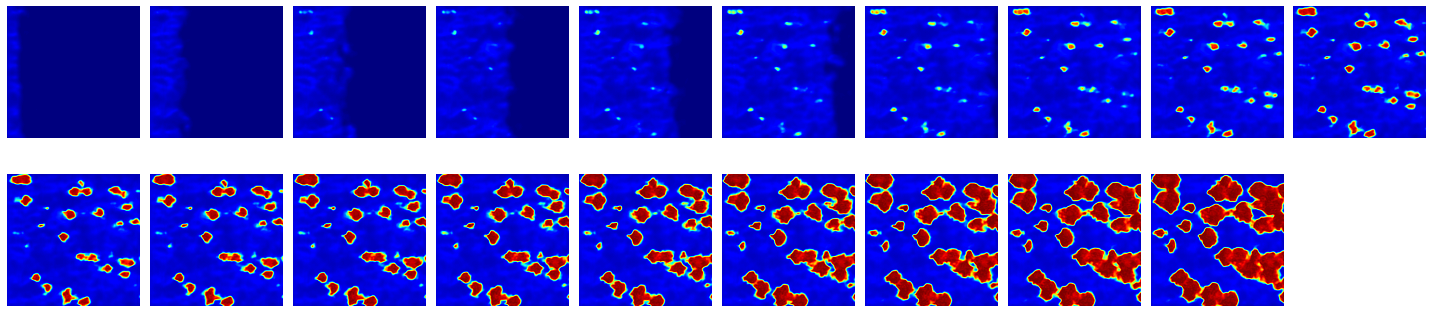

<Figure size 432x288 with 0 Axes>

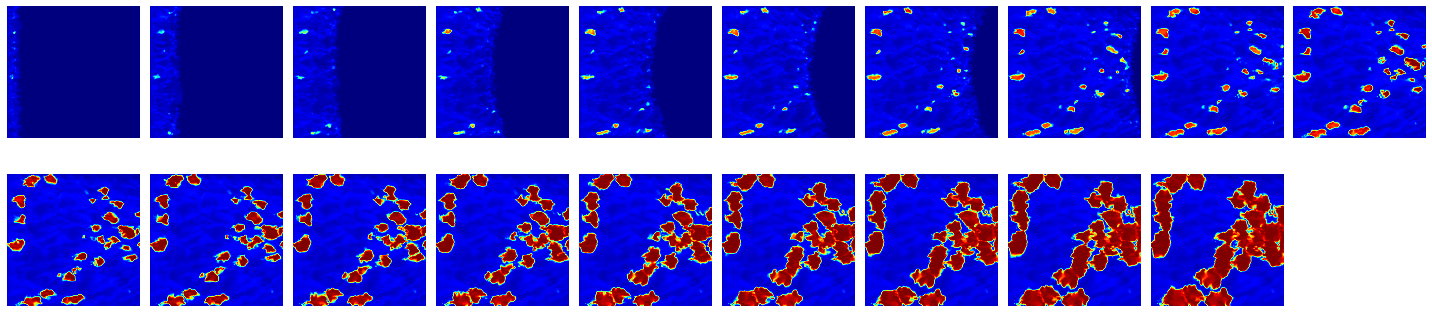

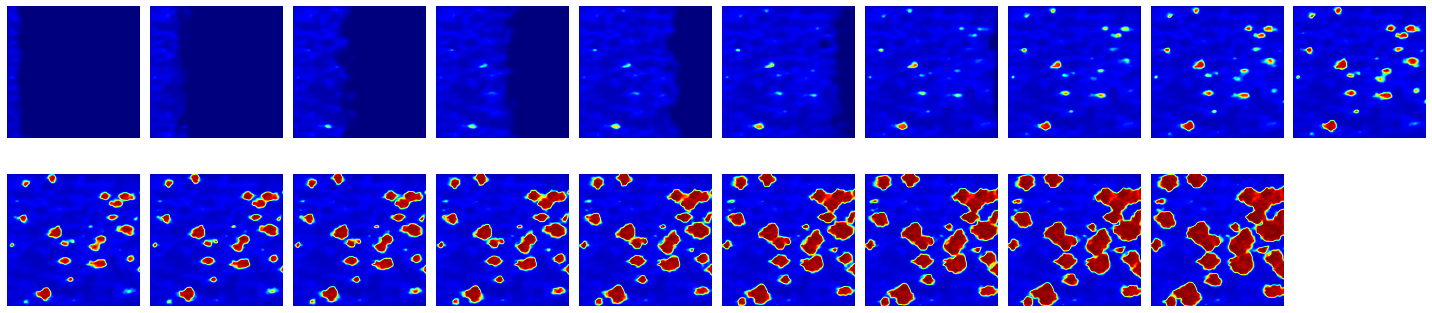

<Figure size 432x288 with 0 Axes>

In [12]:
# inference on test data set
for case_idx in range(2):
  plt.figure( figsize=(20, 5) ) 
  for i in range(19):
      plt.subplot(2, 10, i+1)
      plt.imshow( test_Y[case_idx, :, :, i * 2], cmap='jet', vmin=-1., vmax=1. )
      plt.axis('off')
  plt.tight_layout()
  plt.figure( figsize=(20, 5) ) 
  for i in range(19):
      plt.subplot(2, 10, i+1)
      plt.imshow( test_pred[0][case_idx, :, :, i * 2], cmap='jet', vmin=-1., vmax=1. )
      plt.axis('off')
  plt.tight_layout()
  plt.show()
  plt.figure()